In [354]:
import pandas as pd
import json
import tweepy
import seaborn
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import numpy as np

analyzer = SentimentIntensityAnalyzer()

In [355]:
# Twitter API Keys
consumer_key = "CVc2M9QN0c5W6K2GfVmOPawXV"
consumer_secret = "1pd71bFZ21fKsMX2rVbqmUsFW7wcWNFuPCyAxU6eR9q8zaCTdQ"
access_token = "3239960633-2W7mQ8aZVfrktTW9MY6GiuYKeyuDnB0vqOEV6NM"
access_token_secret = "Zqxcsos88Yc4rI8gcxeX9Or6ho3llweohMJy5Tq1Yjfbm"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [356]:
#Pull last 100 tweets from each news outlet
target_user = ("@BBCWorld", "@CBSNews", "@FoxNews", "@nytimes", "@CNN")

counter_list = []
tweet_text = []
tweet_times = []
user_names = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for name in target_user:
    
    public_tweets = api.user_timeline(name, count=100, result_type="recent")        
    counter = 1
    
    for tweet in public_tweets:
         # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet['text'])["compound"]
        pos = analyzer.polarity_scores(tweet['text'])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        tweet_text.append(tweet['text'])
        tweet_times.append(tweet["created_at"])

        # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

        user_names.append(tweet['user']['screen_name'])
        
        counter_list.append(counter)
        counter = counter + 1


In [357]:
tweets_df = pd.DataFrame({'Account Name': user_names,
                         'Text': tweet_text,
                         'Created at': tweet_times,
                        'Overall Score': compound_list,
                        'Positive Score': positive_list,
                        'Negative Score': negative_list,
                        'Neutral Score': neutral_list,
                         'Tweets Ago': counter_list})


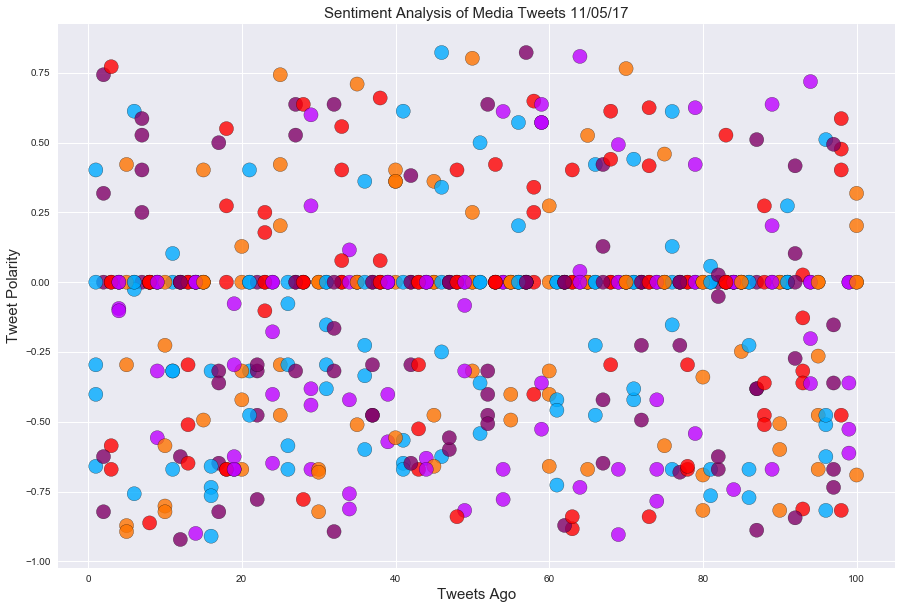

In [358]:
colors = ('#00abff', '#800067', 'r', '#bd00ff', '#ff7400')
plt.figure(figsize=(15,10))

news = plt.scatter(tweets_df['Tweets Ago'], tweets_df['Overall Score'], c = colors, s = 200, alpha = 0.8, edgecolors= 'k',
           label = tweets_df['Account Name'])

plt.xlabel("Tweets Ago", fontsize = 15)
plt.ylabel("Tweet Polarity", fontsize = 15)
plt.title('Sentiment Analysis of Media Tweets %s' % datetime.today().strftime('%m/%d/%y'), fontsize = 15 )
#plt.legend(handles=[news])
plt.savefig('Scatter Plot.png')

plt.show()

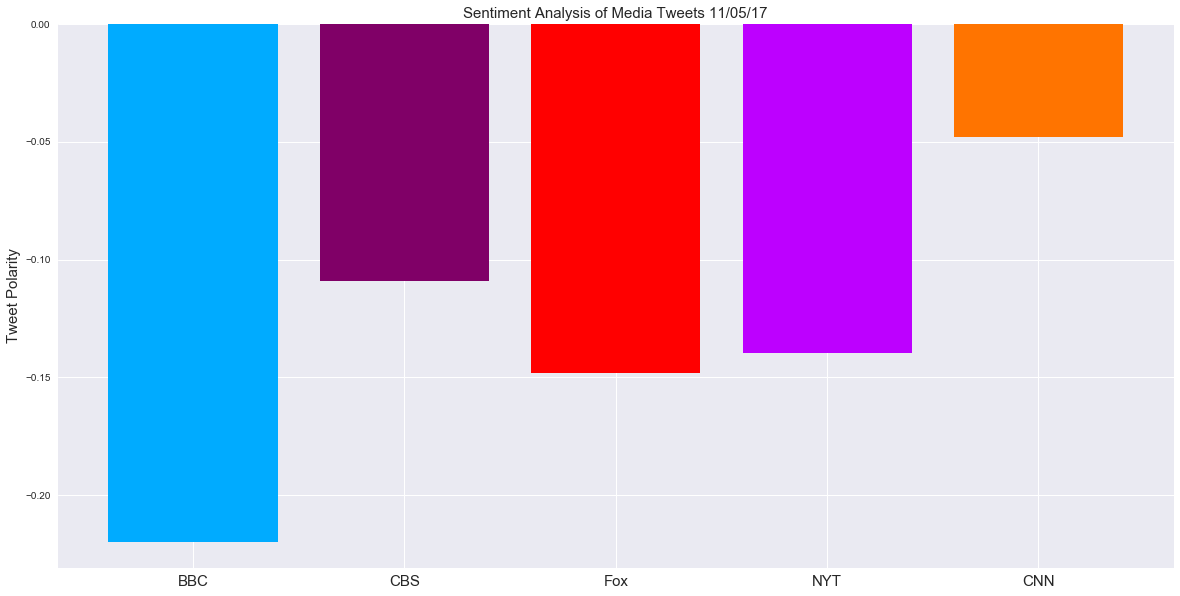

In [359]:
#plt.figure(figsize=(15,10))
grouped = tweets_df['Overall Score'].groupby(tweets_df['Account Name'])
grouped = grouped.mean()
grouped

x_axis = np.arange(len(target_user))

plt.figure(figsize=(20,10))

plt.bar(x_axis, grouped, align = 'edge', color = colors)
plt.ylabel("Tweet Polarity", fontsize = 15)


tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "Fox", "NYT", "CNN"], fontsize = 15)
plt.title('Sentiment Analysis of Media Tweets %s' % datetime.today().strftime('%m/%d/%y'), fontsize = 15 )

#plt.savefig("Bar Chart.png")
plt.show()

Observed trends:

1. Most tweets from these news sources are neutral but when you look at the average they are very negative
2. The international news tend to have more negative news than local news stations
3. BBC tends to have the most negative news whilst CNN has the least negative.